In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

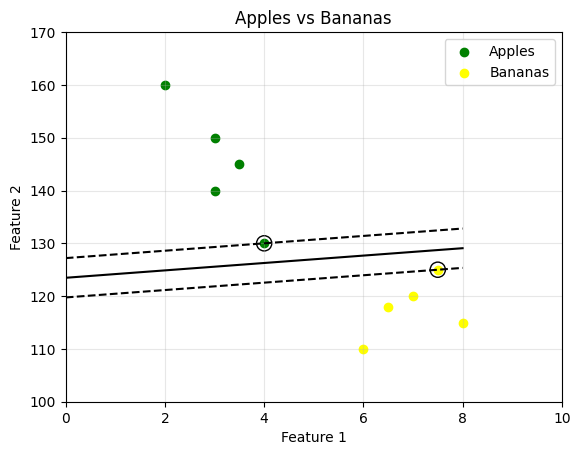

[ 0.18791946 -0.26845638]
33.14765100671113


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

#Create a scatter plot
#Apples = one color, Bananas = another
#Feature 1 on X-axis, Feature 2 on Y-axis
#Add title and legend
#Use scikit-learn SVC(kernel="linear") or LinearSVC
#Fit the model
#Print coefficients and intercept
#Draw decision boundary (where decision_function = 0)
#Draw margins (where decision_function = +1 and -1)
#Overlay on scatter plot
#Predict labels on X
#Compute confusion matrix
#Compute accuracy
#Print both

apples = np.array([[3, 150], [4, 130], [2, 160], [3, 140], [3.5, 145]])
bananas = np.array([[7, 120], [6, 110], [8, 115], [7.5, 125], [6.5, 118]])

# Combine features and create labels (-1 for apples, 1 for bananas)
X = np.vstack([apples, bananas])
labels = np.array([-1, -1, -1, -1, -1, 1, 1, 1, 1, 1])

clf = SVC(kernel="linear")
clf.fit(X, labels)

w = clf.coef_[0]
b = clf.intercept_[0]


best_slope = -(w[0]/w[1])
best_intercept = (-b / w[1])

line_x = np.linspace(0, 8, 100)
line_y = best_slope * line_x + best_intercept
y_up = line_y + 1 / w[1]
y_down = line_y - 1 / w[1]

plt.scatter(apples[:, 0], apples[:, 1], color="green", label="Apples")
plt.scatter(bananas[:, 0], bananas[:, 1], color="yellow", label="Bananas")
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            edgecolors="black", facecolors="none", s=120)

plt.plot(line_x, line_y, "k")       # decision boundary
plt.plot(line_x, y_up, "k--")       # margin
plt.plot(line_x, y_down, "k--")     # margin

plt.xlim(0, 10)
plt.ylim(100, 170)
plt.grid(True, alpha=0.3)
plt.title("Apples vs Bananas")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(w) 
print(b)

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = clf.predict(X)
cm = confusion_matrix(labels, y_pred)
print("prediction:", y_pred)
print("true:      ", labels)
print()
print("Confusion matrix:\n", cm)

print("Accuracy:", accuracy_score(labels, y_pred))

prediction: [-1 -1 -1 -1 -1  1  1  1  1  1]
true:       [-1 -1 -1 -1 -1  1  1  1  1  1]

Confusion matrix:
 [[5 0]
 [0 5]]
Accuracy: 1.0
